In [1]:
fasta_file = "/mnt/projects/sochkalova/Psittacus/phyl/Psittacus_all_aligned.mfa"    

In [2]:
def read_fasta_file(fasta_file):              #задать функцию
    fasta = {}                                #создать пустой словарь fasta
    header = None                             #создать переменную header с неопределенным значением
    with open(fasta_file) as fh:              #
        for i, line in enumerate(fh):         #
            line = line.strip()               #строка совпадает с такой же строкой, из кот. удалены все пробелы
            if line.startswith(">"):          #если строка начитается с >
                if header:                    #
                    fasta[header] = "".join(seq) #
                header = line[1:]             #
                seq = []                      #создать пустой список seq
            else:
                seq.append(line)              #
        if header:                            #
            fasta[header] = "".join(seq)      #
    return fasta                              #конец тела функции

In [3]:
fasta = read_fasta_file(fasta_file)           

In [4]:
print(fasta)                                  #напечатать словарь, чтобы убедиться, что все ок

{'Psittacus2': 'gtccttgtagcttaaaacaaaagcatggcactgaagacgccaagacggataccgctcccgaggacaaaaagacttagtcctaaccttaccattaattcttgcttaacgtatacatgcaagtatccgcgccccagtgcaaacgcccccaaccccttaccaaggtaaaaggagcaggcatcaggcacgtcccaacagcccaaaacgccatgctcagccacacccccacgggtactcagcagtaactaacattaagcaataggtgcaagcctgacttagttaaggcaacccagggttggtaaatcttgtgccagccaccgcggtcacacaagagacccaaattaaccgtacccggcgtaaagagtgggccaaaactatcacagccaattaagatcaaaccgtagtccaagctgtcataagcctaagacaccctctaaacccaacctgaagacgatcttaacgtccatgacctatcacaccccacgaaagccaaggcacaaactgggattagataccccactatgcttggccctaaatccagatgtccaccgcacatgcacatccgcccgagaactacgagcataaacgcttaaaactctaaggacttggcggtgccctaaacccacctagaggagcctgttctgtaatcgataatccacgatccacccgaccacttcttgccgaaatcagcctacataccgccgtccccagcccacctccatgagagaacaacagtgagcccaacagccccacaccagccactaacaagacaggtcaaggtatagcccacgaagtggaagaaatgggctacattttctaagatagaacaaccccgacggaagggagcctgaaacctgccccc-aaaggaggatttagcagtaaagtaggataagagagccttctttaagccggccctagggcacgtacacaccgcccgtcaccctcctcatatgcccccaacacagtaactaacacaataaacagct

In [5]:
for header in fasta:                       #для каждого ключа header в словаре fasta
    print(header)                          #напечатать header
   # print(fasta[header][100])             #напечатать 100-ый символ в значении
    print(len(fasta[header]))              #напечатать длину значения

Psittacus2
17981
Psittacus1
17981
Psittacus5
17981
Psittacus10
17981
Psittacus11_hyb
17981
Psittacus9
17981
Psittacus8
17981
Psittacus12
17981
Psittacus15
17981


In [6]:
headers = list(fasta.keys())                            #создать список из значений ключей словаря fasta
print(headers)                                          #напечатать этот список      
for i in range(0, len(fasta[headers[0]]),100):          #для каждой сотни символов
    print("%s\t%s\t%s" % ("MT", i, i + 100-1))          #
    if len(set([fasta[x][i] for x in headers])) > 1:    #
        print(i, set([fasta[x][i] for x in headers]))   #
    

['Psittacus2', 'Psittacus1', 'Psittacus5', 'Psittacus10', 'Psittacus11_hyb', 'Psittacus9', 'Psittacus8', 'Psittacus12', 'Psittacus15']
MT	0	99
MT	100	199
MT	200	299
MT	300	399
MT	400	499
MT	500	599
MT	600	699
MT	700	799
MT	800	899
MT	900	999
MT	1000	1099
MT	1100	1199
MT	1200	1299
MT	1300	1399
MT	1400	1499
MT	1500	1599
MT	1600	1699
MT	1700	1799
MT	1800	1899
MT	1900	1999
MT	2000	2099
MT	2100	2199
MT	2200	2299
MT	2300	2399
MT	2400	2499
MT	2500	2599
MT	2600	2699
MT	2700	2799
MT	2800	2899
MT	2900	2999
MT	3000	3099
MT	3100	3199
MT	3200	3299
MT	3300	3399
MT	3400	3499
MT	3500	3599
MT	3600	3699
MT	3700	3799
MT	3800	3899
MT	3900	3999
MT	4000	4099
MT	4100	4199
MT	4200	4299
MT	4300	4399
MT	4400	4499
MT	4500	4599
MT	4600	4699
MT	4700	4799
MT	4800	4899
MT	4900	4999
MT	5000	5099
MT	5100	5199
MT	5200	5299
MT	5300	5399
MT	5400	5499
MT	5500	5599
MT	5600	5699
MT	5700	5799
MT	5800	5899
MT	5900	5999
MT	6000	6099
MT	6100	6199
MT	6200	6299
MT	6300	6399
MT	6400	6499
MT	6500	6599
MT	6600	6699
MT	6700	6799
MT	6

In [76]:
aratinga_input_file = "Aratinga_circos1.txt"
headers = list(fasta.keys())
n = len(fasta[headers[0]])
#print(headers) 
with open(aratinga_input_file, "w") as fw:
    for i in range(0, len(fasta[headers[0]]),100):
        var = 0
        for j in range(i, min(i + 100, n)):
            if len(set([fasta[x][j] for x in headers])) > 1:
                var += 1
        s = "%s\t%s\t%s\tfill_colors=%s\n" % ("MT", i, i + 100-1, rgb_colors[var])
        fw.write(s)     
    

In [ ]:
headers = list(fasta.keys())
arating_input_files = []
for name in headers:
    s = "Aratinga_circos1.%s.txt" % (name)
    aratinga_input_files.append(s)
    with open(aratinga_input_files, "w") as fw:
         for i in range(0, len(fasta[headers[0]]),100):
                
#aratinga_input_file = "Aratinga_circos1.txt"
#
#print(headers) 
#with open(aratinga_input_file, "w") as fw:
   # for i in range(0, len(fasta[headers[0]]),100):
        #var = 0
       # for j in range(i, min(i + 100, n)):
            #if len(set([fasta[x][j] for x in headers])) > 1:
             #   var += 1
      #  s = "%s\t%s\t%s\tfill_colors=%s\n" % ("MT", i, i + 100-1, rgb_colors[var])
        fw.write(s)
    

In [3]:
import seaborn

214, 222, 191
155, 199, 153
100, 168, 141
70, 124, 137
59, 74, 113
43, 30, 62


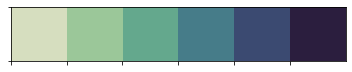

In [10]:
current_palette = seaborn.cubehelix_palette(6, start = .5, rot =-.75)
seaborn.palplot(current_palette)

seaborn.colors.xkcd_rgb

current_palette

rgb_colors = {}
for var, (r,g,b) in enumerate(current_palette):
    s = "%s, %s, %s" % (int(r*255), int(g*255), int(b*255)) 
    rgb_colors[var] = s
    print("%s, %s, %s" % (int(r*255), int(g*255), int(b*255)))
    

In [2]:
current_palette = seaborn.cubehelix_palette(8, start = .5, rot =-.75)
seaborn.palplot(current_palette)

seaborn.colors.xkcd_rgb

current_palette

rgb_colors = {}
for var, (r,g,b) in enumerate(current_palette):
    s = "%s, %s, %s" % (int(r*255), int(g*255), int(b*255)) 
    rgb_colors[var] = s
    print("%s, %s, %s" % (int(r*255), int(g*255), int(b*255)))
    

NameError: name 'seaborn' is not defined

In [7]:
rgb_colors = {0: '214,222,191', 1: '174,206,161', 2: '130,187,146', 3: '94,162,141', 4: '73,131,138', 5: '62,95,126', 6: '56,60,101', 7: '43,30,62'}
from collections import Counter
headers = list(fasta.keys())
n = len(fasta[headers[0]])  
for name in headers:
    for i in range(0, len(fasta[headers[0]]), 100):
        var = 0
        for j in range(i, min(i+100,n)):
            ref_nucl = Counter([fasta[x][j] for x in headers]).most_common(1)[0][0]
            #print(ref_nucl)
            parrot_nucl = fasta[name][j]
            other_nucls = [fasta[x][j] for x in headers if x != name]
            if parrot_nucl == ref_nucl:
                var += 1
        if var > 0:
            print(j, var, name)
        s = "%s\t%s\t%s\tfill_color=%s\n" % ("MT", i, i+100-1, rgb_colors[var])
        print(s)

99 99 Psittacus2


KeyError: 99